Notebook for orbital representation of TNOs found in Catalina Sky Survey Zooniverse project

<br>

Results listed at 
https://www.zooniverse.org/projects/fulsdavid/catalina-outer-solar-system-survey/about/results

<br>


In [1]:
# exclude this line on your local environment if you already have REBOUND installed
!pip install rebound


     |████████████████████████████████| 245kB 2.7MB/s 
  Created wheel for rebound: filename=rebound-3.12.2-cp36-cp36m-linux_x86_64.whl size=561622 sha256=4dc0917aa63a3a99611dff5acafd0df2eebb0475cbf3bc59c53870fe863e36bd
  Stored in directory: /root/.cache/pip/wheels/e7/c5/a8/af7b610100ff48c07ea083aec02daca70488e435edca2f0b74
Successfully built rebound


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import rebound

from google.colab import files


In [3]:
sim = rebound.Simulation()

date = "2020-08-10 00:00"
sim.add("Sun", date = date)
#sim.add("Jupiter", date = date)
#sim.add("Saturn", date=date)
#sim.add("Uranus", date=date)
sim.add("Neptune", date=date)

sim.move_to_com()
sim.integrator = "whfast"
sim.t = 0

sim.collision_resolve = "merge"



Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


In [4]:
sim.add("2005 RS43", date = date)
sim.add("2004 UX10", date=date)
sim.add("Lempo", date=date)
sim.add("2014 XR40", date=date)
sim.add("2002 UX25", date=date)

sim.add("2010 VZ98", date=date)
sim.add("2014 YF50", date=date)
sim.add("2014 YA50", date=date)


Searching NASA Horizons for '2005 RS43'... Found: 308379 (2005 RS43).
Searching NASA Horizons for '2004 UX10'... 

/usr/local/lib/python3.6/dist-packages/rebound/horizons.py:140: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: 144897 (2004 UX10).
Searching NASA Horizons for 'Lempo'... Found: 47171 Lempo (1999 TC36).
Searching NASA Horizons for '2014 XR40'... Found: 523772 (2014 XR40).
Searching NASA Horizons for '2002 UX25'... Found: 55637 (2002 UX25).
Searching NASA Horizons for '2010 VZ98'... Found: 445473 (2010 VZ98).
Searching NASA Horizons for '2014 YF50'... Found: 523777 (2014 YF50).
Searching NASA Horizons for '2014 YA50'... Found: (2014 YA50).


/usr/local/lib/python3.6/dist-packages/rebound/plotting.py:81: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  ax_top   = divider.append_axes("top",  size="%.2f%%"%(100.*slices), sharex=ax_main)
/usr/local/lib/python3.6/dist-packages/rebound/plotting.py:83: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.wspace'].  Set pad=0 to keep the old behavior.
  ax_right = divider.append_axes("right", size="%.2f%%"%(100.*slices), sharey=ax_main)


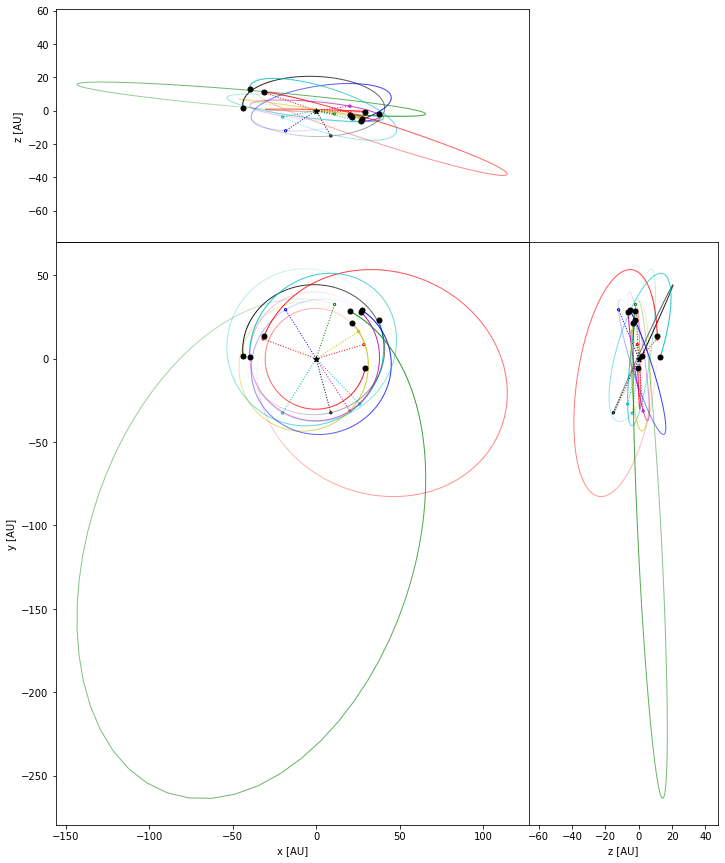

In [5]:
fig = rebound.OrbitPlot(sim, figsize = (15, 15)
  , unitlabel="[AU]"
  , color=True, periastron=True
  , slices=0.4
  #, xlim = 60, ylim = 60
  #, plotparticles = (4, 5, 6)
  #, fancy=True
);



In [8]:

fig[0].tight_layout()
fig[0].savefig('plot.png', format='png')

files.download('plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
sim.status()


---------------------------------
REBOUND version:     	3.12.2
REBOUND built on:    	Sep  1 2020 11:47:32
Number of particles: 	10
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0015134052706333983 y=0.0002925687316282363 z=2.8857344988553145e-05 vx=-1.7432837328104265e-06 vy=-9.298671375859886e-06 vz=2.315275058218485e-07>
<rebound.Particle object, m=5.151383772628674e-05 x=29.378616259862348 y=-5.679420220694265 z=-0.560186277362668 vx=0.0338410766845433 vy=0.18050822431959673 vz=-0.004494472088296811>
<rebound.Particle object, m=0.0 x=37.55764293118954 y=22.950278452362873 z=-2.011989455728543 vx=-0.053685505743911316 vy=0.14499230208965871 vz=0.024495834179869194>
<rebound.Particle object, m=0.0 x=27.02105781345608 y=27.905259341747588 z=-6.379467178881721 vx=-0.11007435078479486 vy=0.11420116770551586 vz=-0.00644848778131372>
<rebound.Particle object, m=

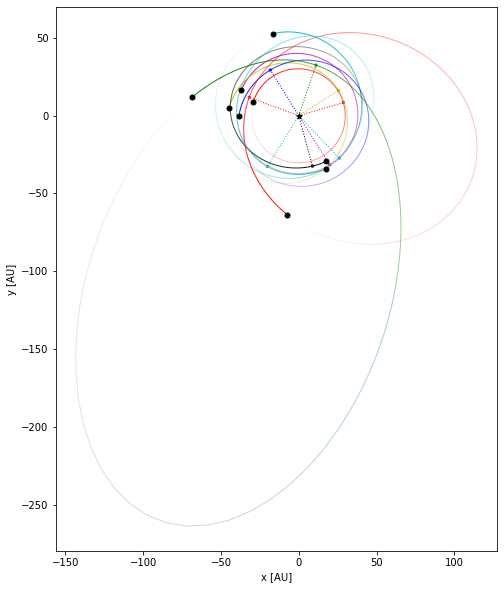

In [10]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
sim.move_to_com()
for i in range(100):
    sim.integrate(sim.t+5)
    fig, ax = rebound.OrbitPlot(sim,color=True,figsize=(10, 10), unitlabel="[AU]", periastron=True)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)